# 1: Neural Networks And Iris Flowers

Instructions
Visualize the data using the method hist() on our DataFrame iris and showing the plots.
Hint
Use plt.show() will show the plots.

    sepal_length  sepal_width  petal_length  petal_width          species
4            6.5          2.8           4.6          1.5  Iris-versicolor
28           6.0          2.9           4.5          1.5  Iris-versicolor
83           6.3          2.8           5.1          1.5   Iris-virginica
8            6.6          2.9           4.6          1.3  Iris-versicolor
39           5.5          2.5           4.0          1.3  Iris-versicolor
['Iris-versicolor' 'Iris-virginica']


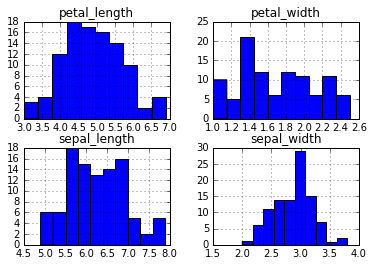

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris = pd.read_csv("iris.csv")
iris.head()

shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

print(iris.species.unique())

iris.hist()
plt.show()

# 2: Neurons

Instructions
Write a function called sigmoid_activation with inputs x a feature vector and theta a parameter vector of the same length to implement the sigmoid activation function.
Assign the value of sigmoid_activation(x0, theta_init) to a1. a1 should be a vector.
Hint
Use the NumPy (dot function)[http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html] to multiply theta with x.

In [3]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

print(np.dot(z,y.T))

iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

x0 = X[0]

theta_init = np.random.normal(0,0.01,size=(5,1))

def sigmoid_activation(x,theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T, x)))

a1 = sigmoid_activation(x0,theta_init)  

[[17]]


# 3: Cost Function

Instructions
Write a function, singlecost(), that can compute the cost from just a single observation.
This function should use input features X, targets y, and parameters theta to compute the cost function.
Assign the cost of variables x0, y0, and theta_init to variable first_cost.
Hint
Use the sigmoid_activation() function to compute the activation, then apply the cost function formula.

In [4]:
x0 = X[0]
y0 = y[0]

theta_init = np.random.normal(0,0.01,size=(5,1))

def single_cost(X,y,theta):
    X = np.asarray(X)
    y = np.asarray(y)
    theta = np.asarray(theta)
    
    h = sigmoid_activation(X.T, theta)

    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    
    return cost

first_cost = single_cost(x0, y0, theta_init)
first_cost

0.6988955370388521

# 4: Compute The Gradients

Instructions
Compute the average gradients over each observation in X and corresponding target y with the initialized parameters theta_init.
Assign the average gradients to variable grads.
Hint
Use the sigmoid_activation function to aid the computation.

In [5]:
theta_init = np.random.normal(0,0.01,size=(5,1))

grads = np.zeros(theta_init.shape)

n = X.shape[0]

for j, obs in enumerate(X):
    h = sigmoid_activation(obs, theta_init)
    delta = (y[j]-h) * h * (1 - h) * obs
    
    grads += delta[:,np.newaxis]/X.shape[0]
    
grads

array([[-0.00037813],
       [-0.0429645 ],
       [-0.01378977],
       [-0.08228173],
       [-0.0442427 ]])

# 5: Two Layer Network

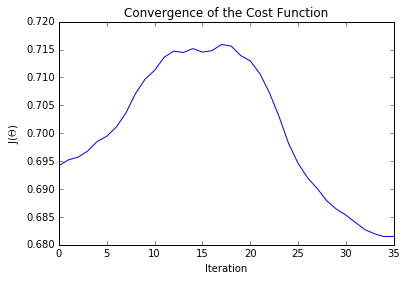

In [6]:
theta_init = np.random.normal(0,0.01,size=(5,1))

learning_rate = 0.1

maxepochs = 10000

convergence_thres = 0.0001

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = single_cost(X, y, theta)
    costprev = cost + convergence_thres + 0.01
    counter = 0
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta)
            delta = (y[j]-h) * h * (1-h) * obs
            grads += delta[:,np.newaxis]/X.shape[0]
            theta += grads * learning_rate
            counter += 1
            costprev = cost
            cost = single_cost(X, y, theta)
            costs.append(cost)
            if np.abs(costprev-cost) < convergence_thres:
                break
        
        plt.plot(costs)
        plt.title("Convergence of the Cost Function")
        plt.ylabel("J($\Theta$)")
        plt.xlabel("Iteration")
        plt.show()
        return theta
    
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

# 6: Neural Network

Instructions
Write a function feedforward() that will take in an input X and two sets of parameters theta0 and theta1 to compute the output 
.
Assign the output to variable h using features X and parameters theta0_init and theta1_init.
Hint
Use the function sigmoid_activation() twice, once for each layer, inputted activation units in the second time. Add a column of ones to the hidden layer to include the bias term.

In [7]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def feedforward(X, theta0, theta1):
    a1 = sigmoid_activation(X.T, theta0).T
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    
    out = sigmoid_activation(a1.T, theta1)
    
    return out

h = feedforward(X, theta0_init, theta1_init)   
h

array([[ 0.49401199,  0.49400976,  0.4940158 ,  0.49400078,  0.49401382,
         0.49403639,  0.49403204,  0.49400689,  0.49399421,  0.49404517,
         0.49405164,  0.49401737,  0.49403888,  0.49404137,  0.49400269,
         0.49403518,  0.49402021,  0.49400926,  0.49402705,  0.49403284,
         0.49400332,  0.49402247,  0.49403397,  0.49404019,  0.4940246 ,
         0.49400298,  0.49399716,  0.49400183,  0.49402238,  0.49402388,
         0.49400128,  0.49403077,  0.49404116,  0.49401353,  0.49404007,
         0.49403587,  0.49402921,  0.49403479,  0.49403594,  0.49399534,
         0.49400024,  0.49399643,  0.49402871,  0.49405928,  0.4939955 ,
         0.49403342,  0.4940343 ,  0.49402817,  0.4940106 ,  0.4940401 ,
         0.49403434,  0.49402004,  0.49403594,  0.49400849,  0.49400627,
         0.49404191,  0.494046  ,  0.49399858,  0.49402038,  0.49400825,
         0.49401953,  0.49402808,  0.49400383,  0.49400129,  0.49400782,
         0.49399771,  0.4940286 ,  0.49400258,  0.4

In [8]:
def multiplecost(X, y, theta0, theta1):
    h = feedforward(X, theta0, theta1)
    inner = y * np.log(h) + (1 - y) * np.log(1 - h)
    return -np.mean(inner) 

c = multiplecost(X, y, theta0_init, theta1_init)
print("The value is %.2f" % (c))

The value is 0.69


# 8: Backpropagation

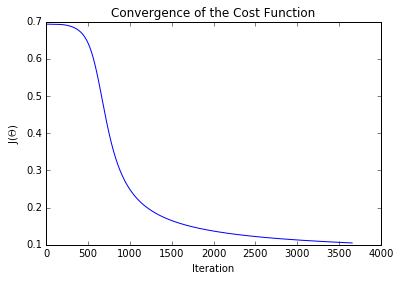

In [9]:
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

# 9: Splitting Data

Instructions
Choose the first 70 rows in both X and y and assign them respectively to X_train and y_train.
The last 30 rows should be assigned to variables X_test and y_test.
Hint
The first 70 values in a list can be selected using the slice [:70] and the last 30 values can be selected using the slice [-30:].

In [10]:
X_train = X[:70]
y_train = y[:70]
X_test = X[-30:]
y_test = y[-30:]

# 10: Predicting Iris Flowers

Instructions
Train the neural network using X_test and y_test and model, which has been initialized with a set of parameters.
Once training is complete, use the predict() function to return the probabilities of the flower matching the species Iris-versicolor.
Compute the AUC score, using roc_auc_score() and assign it to auc.
Hint
The method roc_auc_score requires labels and probabilities as inputs, which must both be vectors.

In [13]:
from sklearn.metrics import roc_auc_score
learning_rate = 0.5
maxepochs = 10000
convergence_thres = 0.00001
hidden_units = 4
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs, convergence_thres=convergence_thres, hidden_layer=hidden_units)
model.learn(X_train, y_train)
yhat = model.predict(X_test)[0]
auc = roc_auc_score(y_test, yhat)
print(auc)

1.0
